# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




# Этапы выполнения лабораторной работы 1:
#### Выполнила Горелик Мария, 4 курс ПИ, 11 гр.

#### Определение варианта

In [2]:
N = 3
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
cols[N % 7]

'Screen_Time_Before_Bed'

### Загрузка датасета

In [3]:
import pandas as pd

df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


In [4]:
df.shape

(3000, 25)

### Выбор столбца для анализа

In [5]:
data = df[['Screen_Time_Before_Bed']]
data.head()

,Screen_Time_Before_Bed
0,1.4
1,0.9
2,0.5
3,1.4
4,1.0


### Проверка пустых значений

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Screen_Time_Before_Bed  3000 non-null   float64
dtypes: float64(1)
memory usage: 23.6 KB


Пропущенных значений в столбце нет

## I. 

### Среднее

In [7]:
print(f"Mean: {data['Screen_Time_Before_Bed'].mean():.5f}")

Mean: 1.00673


### Дисперсия

In [8]:
print(f"Variance: {data['Screen_Time_Before_Bed'].var():.5f}")

Variance: 0.24293


### Мода

Для расчета моды округлим значения до 1-го знака после запятой (как и представлено в датасете) для учета неточности хранения для типа float:

In [9]:
modes = data['Screen_Time_Before_Bed'].round(1).mode()
print(f'Number of modes: {len(modes)}')

Number of modes: 1


In [10]:
print(f'Mode: {modes[0]}')

Mode: 1.0


### Медиана

In [11]:
print(f"Median: {data['Screen_Time_Before_Bed'].median()}")

Median: 1.0


### Квантили уровня 0.25, 0.5, 0.75

In [12]:
data['Screen_Time_Before_Bed'].quantile([0.25, 0.5, 0.75])

0.25    0.7
0.50    1.0
0.75    1.4
Name: Screen_Time_Before_Bed, dtype: float64

### Эксцесс Фишера (g₂)

$$
g_2 = \frac{\mu_4}{\mu_2^2} - 3 = \beta_2 - 3
$$

$$
g_2 = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{\left(\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2\right)^2} - 3

In [13]:
print(f"Kurtosis: {float(data['Screen_Time_Before_Bed'].kurt()):.3f}")

Kurtosis: -0.349


Легкий хвост, плосковершинное

### Ассиметрия

In [14]:
print(f"Skewness: {float(data['Screen_Time_Before_Bed'].skew()):.3f}")

Skewness: 0.098


Примерно симметричное распределение (< 0.5)

### Интерквартильный размах

In [15]:
Q1 = data['Screen_Time_Before_Bed'].quantile(0.25)
Q3 = data['Screen_Time_Before_Bed'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 0.7


### 1. Гистограмма

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

Формула Стерджеса: k = 1 + log2(n)

In [17]:
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 5)

# Функция для расчета количества бинов по формуле Стерджеса
def sturges_rule(series):
    """Рассчитывает количество бинов по формуле Стерджеса"""
    n = len(series)
    bins = int(1 + np.log2(n))  # Формула Стерджеса: k = 1 + log2(n)
    return max(5, min(bins, 50))  

# Гистограмма с бинами по Стерджесу
def plot_histogram_sturges(series, title):
    """Гистограмма с бинами по формуле Стерджеса"""
    bins_sturges = sturges_rule(series)
    fig, ax = plt.subplots(figsize=(10, 6))
    n, bins, patches = ax.hist(series, bins=bins_sturges, density=True, alpha=0.7, 
                              color='skyblue', edgecolor='navy', linewidth=1,
                              label=f'Бины по Стерджесу ({bins_sturges})')

    mean_val = series.mean()
    median_val = series.median()
    
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, 
               label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='orange', linestyle='--', linewidth=2, 
               label=f'Медиана: {median_val:.2f}')
    
    ax.set_xlabel('Значения')
    ax.set_ylabel('Плотность')
    ax.set_title(f'Гистограмма: {title}\n'
                f'Бины по Стерджесу: {bins_sturges} | '
                f'Асимметрия: {series.skew():.3f} | '
                f'Эксцесс: {series.kurt():.3f}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print(f"Формула Стерджеса для n={len(series)}:")
    print(f"  k = 1 + log2({len(series)}) = 1 + {np.log2(len(series)):.2f} = {bins_sturges} бинов")
    print(f"  Диапазон данных: [{series.min():.2f}, {series.max():.2f}]")
    print(f"  Ширина бина: {(series.max() - series.min()) / bins_sturges:.2f}")

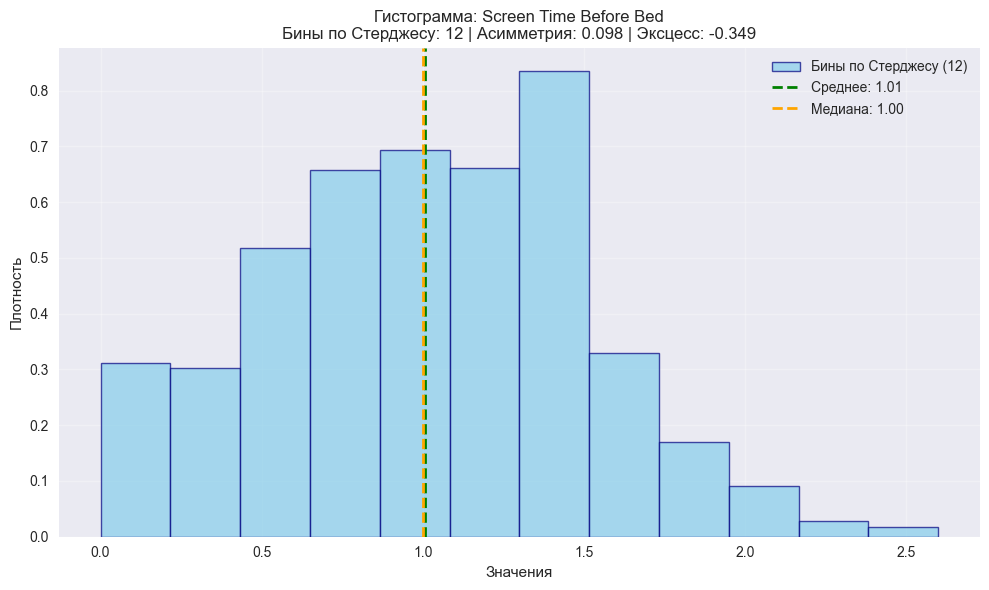

Формула Стерджеса для n=3000:
  k = 1 + log2(3000) = 1 + 11.55 = 12 бинов
  Диапазон данных: [0.00, 2.60]
  Ширина бина: 0.22


In [17]:
plot_histogram_sturges(data['Screen_Time_Before_Bed'], 'Screen Time Before Bed')

### 2. Эмпирическая функция распределения

In [18]:
def plot_ecdf(series, title):
    """Построение эмпирической функции распределения"""
    
    x = np.sort(series)
    y = np.arange(1, len(x) + 1) / len(x)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    ax.step(x, y, where='post', linewidth=2, color='blue', label='ECDF')
    
    quantiles = [0.25, 0.5, 0.75]
    colors = ['red', 'green', 'orange']
    labels = ['Q1 (25%)', 'Медиана (50%)', 'Q3 (75%)']
    
    for q, color, label in zip(quantiles, colors, labels):
        q_value = series.quantile(q)
        q_ecdf = np.searchsorted(x, q_value) / len(x)
        ax.axvline(q_value, color=color, linestyle='--', alpha=0.7, 
                  label=f'{label}: {q_value:.2f}')
        ax.plot(q_value, q_ecdf, 'o', color=color, markersize=8)
    
    ax.set_xlabel('Значения')
    ax.set_ylabel('Вероятность P(X ≤ x)')
    ax.set_title(f'Эмпирическая функция распределения: {title}\n'
                f'Объем выборки: n = {len(series)}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_ylim(0, 1)
    
    plt.tight_layout()
    plt.show()

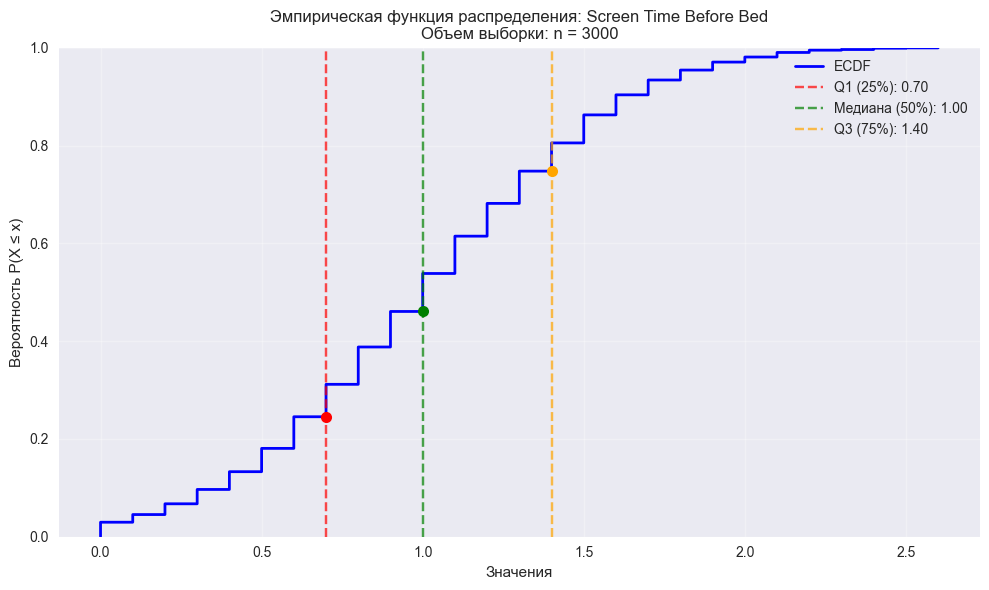

In [19]:
plot_ecdf(data['Screen_Time_Before_Bed'], 'Screen Time Before Bed')

## II. Проверить данные на нормальность, используя критерии:
### 1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)

In [20]:
import numpy as np
import pandas as pd
from scipy import stats

def chi_square_normality_test(series, alpha=0.05):
    """
    Критерий Хи-квадрат для проверки нормальности (реализация вручную)
    """
    n = len(series)
    
    # Параметры нормального распределения
    mu = series.mean()
    sigma = series.std()
    
    # Определяем границы интервалов (используем квантили нормального распределения)
    k = max(5, int(1 + 3.322 * np.log10(n)))  # Формула Стерджеса для количества интервалов
    quantiles = np.linspace(0, 1, k + 1)
    boundaries = stats.norm.ppf(quantiles, loc=mu, scale=sigma)
    
    # Наблюдаемые частоты
    observed, _ = np.histogram(series, bins=boundaries)
    
    # Ожидаемые частоты (теоретические)
    expected_probabilities = np.diff(quantiles)
    expected = expected_probabilities * n
    
    # Объединяем интервалы с малыми ожидаемыми частотами (минимум 5)
    observed_clean = []
    expected_clean = []
    
    for i in range(len(observed)):
        if expected[i] >= 5:
            observed_clean.append(observed[i])
            expected_clean.append(expected[i])
        else:
            if observed_clean:
                observed_clean[-1] += observed[i]
                expected_clean[-1] += expected[i]
            else:
                observed_clean.append(observed[i])
                expected_clean.append(expected[i])
    
    observed = np.array(observed_clean)
    expected = np.array(expected_clean)
    
    # Статистика Хи-квадрат
    chi_square_stat = np.sum((observed - expected)**2 / expected)
    
    # Степени свободы: k - 1 - 2 
    df = len(observed) - 3
    
    # Критическое значение
    critical_value = stats.chi2.ppf(1 - alpha, df)
    
    # P-value
    p_value = 1 - stats.chi2.cdf(chi_square_stat, df)
    
    return {
        'chi_square_stat': chi_square_stat,
        'critical_value': critical_value,
        'degrees_of_freedom': df,
        'p_value': p_value,
        'reject_normality': chi_square_stat > critical_value,
        'observed_frequencies': observed,
        'expected_frequencies': expected,
        'number_of_intervals': len(observed)
    }

print("ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ ХИ-КВАДРАТ")

result = chi_square_normality_test(data['Screen_Time_Before_Bed'])

print(f"Объем выборки: n = {len(data['Screen_Time_Before_Bed'])}")
print(f"Количество интервалов: {result['number_of_intervals']}")
print(f"Степени свободы: {result['degrees_of_freedom']}")
print(f"Статистика Хи-квадрат: {result['chi_square_stat']:.4f}")
print(f"Критическое значение (α=0.05): {result['critical_value']:.4f}")
print(f"P-value: {result['p_value']:.4f}")

print("\nГИПОТЕЗЫ:")
print("H₀ (нулевая гипотеза): Распределение является нормальным")
print("H₁ (альтернативная гипотеза): Распределение не является нормальным")

print("\nРЕЗУЛЬТАТ:")
if result['reject_normality']:
    print("✓ ОТКЛОНЯЕМ гипотезу H₀")
    print("  Распределение НЕ является нормальным (p < 0.05)")
else:
    print("✓ НЕТ ОСНОВАНИЙ отвергнуть гипотезу H₀")
    print("  Распределение МОЖЕТ СЧИТАТЬСЯ нормальным (p ≥ 0.05)")

print(f"\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Наблюдаемые частоты: {result['observed_frequencies']}")
print(f"Ожидаемые частоты: {result['expected_frequencies'].round(2)}")

ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ ХИ-КВАДРАТ
Объем выборки: n = 3000
Количество интервалов: 12
Степени свободы: 9
Статистика Хи-квадрат: 245.8400
Критическое значение (α=0.05): 16.9190
P-value: 0.0000

ГИПОТЕЗЫ:
H₀ (нулевая гипотеза): Распределение является нормальным
H₁ (альтернативная гипотеза): Распределение не является нормальным

РЕЗУЛЬТАТ:
✓ ОТКЛОНЯЕМ гипотезу H₀
  Распределение НЕ является нормальным (p < 0.05)

ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Наблюдаемые частоты: [290 252 194 199 447 233 229 201 198 173 295 289]
Ожидаемые частоты: [250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]


### 2. Ассиметрии и эксцесса

In [21]:
def skewness_kurtosis_normality_test(series, alpha=0.05):
    """
    Проверка нормальности с помощью критерия асимметрии и эксцесса
    """
    n = len(series)
    
    # Расчет выборочных моментов
    mean = series.mean()
    
    # Центральные моменты
    m2 = np.mean((series - mean)**2)  # дисперсия
    m3 = np.mean((series - mean)**3)  # третий центральный момент
    m4 = np.mean((series - mean)**4)  # четвертый центральный момент
    
    # Асимметрия (коэффициент асимметрии Пирсона)
    skewness = m3 / (m2**1.5)
    
    # Эксцесс (коэффициент эксцесса Фишера)
    kurtosis = m4 / (m2**2) - 3
    
    # Стандартные ошибки для асимметрии и эксцесса
    se_skewness = np.sqrt(6 * n * (n - 1) / ((n - 2) * (n + 1) * (n + 3)))
    se_kurtosis = np.sqrt(24 * n * (n - 1)**2 / ((n - 3) * (n - 2) * (n + 3) * (n + 5)))
    
    # Z-статистики
    z_skewness = skewness / se_skewness
    z_kurtosis = kurtosis / se_kurtosis
    
    # Критические значения (двусторонний тест)
    z_critical = stats.norm.ppf(1 - alpha/2)
    
    # P-values
    p_skewness = 2 * (1 - stats.norm.cdf(np.abs(z_skewness)))
    p_kurtosis = 2 * (1 - stats.norm.cdf(np.abs(z_kurtosis)))
    
    # Объединенный критерий (оба теста должны быть незначимы)
    reject_skewness = np.abs(z_skewness) > z_critical
    reject_kurtosis = np.abs(z_kurtosis) > z_critical
    reject_joint = reject_skewness or reject_kurtosis
    
    # Общий p-value (приблизительно)
    joint_p_value = max(p_skewness, p_kurtosis)
    
    # Оценка нормальности (чем ближе к 1, тем лучше)
    normality_score = 1 - joint_p_value
    
    return {
        'skewness': skewness,
        'kurtosis': kurtosis,
        'z_skewness': z_skewness,
        'z_kurtosis': z_kurtosis,
        'se_skewness': se_skewness,
        'se_kurtosis': se_kurtosis,
        'p_skewness': p_skewness,
        'p_kurtosis': p_kurtosis,
        'joint_p_value': joint_p_value,
        'critical_value': z_critical,
        'reject_skewness': reject_skewness,
        'reject_kurtosis': reject_kurtosis,
        'reject_normality': reject_joint,
        'normality_score': normality_score  
    }

In [22]:
print("ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА")

result = skewness_kurtosis_normality_test(data['Screen_Time_Before_Bed'])

print(f"Объем выборки: n = {len(data['Screen_Time_Before_Bed'])}")
print()

print("РАСЧЕТ АСИММЕТРИИ:")
print(f"Коэффициент асимметрии: {result['skewness']:.4f}")
print(f"Стандартная ошибка асимметрии: {result['se_skewness']:.4f}")
print(f"Z-статистика асимметрии: {result['z_skewness']:.4f}")
print(f"P-value асимметрии: {result['p_skewness']:.4f}")
print(f"Критическое значение (α=0.05): ±{result['critical_value']:.4f}")

print("\nРАСЧЕТ ЭКСЦЕССА:")
print(f"Коэффициент эксцесса: {result['kurtosis']:.4f}")
print(f"Стандартная ошибка эксцесса: {result['se_kurtosis']:.4f}")
print(f"Z-статистика эксцесса: {result['z_kurtosis']:.4f}")
print(f"P-value эксцесса: {result['p_kurtosis']:.4f}")
print(f"Критическое значение (α=0.05): ±{result['critical_value']:.4f}")

print("\nГИПОТЕЗЫ:")
print("H₀ (нулевая гипотеза): Распределение является нормальным")
print("H₁ (альтернативная гипотеза): Распределение не является нормальным")
print("\nКритерий отвержения H₀:")
print("- |Z-асимметрии| > Zкритическое ИЛИ |Z-эксцесса| > Zкритическое")

print("\nРЕЗУЛЬТАТЫ ТЕСТОВ:")
print(f"Тест асимметрии: {'ОТКЛОНЯЕМ H₀' if result['reject_skewness'] else 'НЕТ ОСНОВАНИЙ отвергнуть H₀'}")
print(f"Тест эксцесса: {'ОТКЛОНЯЕМ H₀' if result['reject_kurtosis'] else 'НЕТ ОСНОВАНИЙ отвергнуть H₀'}")

print("\nИТОГОВЫЙ ВЫВОД:")
if result['reject_normality']:
    print("✓ ОТКЛОНЯЕМ гипотезу о нормальности")
    print("  Распределение НЕ является нормальным")
    
    if result['reject_skewness'] and result['reject_kurtosis']:
        print("  Причина: значимые отклонения по асимметрии и эксцессу")
    elif result['reject_skewness']:
        print("  Причина: значимое отклонение по асимметрии")
    else:
        print("  Причина: значимое отклонение по эксцессу")
else:
    print("✓ НЕТ ОСНОВАНИЙ отвергнуть гипотезу о нормальности")
    print("  Распределение МОЖЕТ СЧИТАТЬСЯ нормальным")

ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
Объем выборки: n = 3000

РАСЧЕТ АСИММЕТРИИ:
Коэффициент асимметрии: 0.0984
Стандартная ошибка асимметрии: 0.0447
Z-статистика асимметрии: 2.2009
P-value асимметрии: 0.0277
Критическое значение (α=0.05): ±1.9600

РАСЧЕТ ЭКСЦЕССА:
Коэффициент эксцесса: -0.3503
Стандартная ошибка эксцесса: 0.0894
Z-статистика эксцесса: -3.9202
P-value эксцесса: 0.0001
Критическое значение (α=0.05): ±1.9600

ГИПОТЕЗЫ:
H₀ (нулевая гипотеза): Распределение является нормальным
H₁ (альтернативная гипотеза): Распределение не является нормальным

Критерий отвержения H₀:
- |Z-асимметрии| > Zкритическое ИЛИ |Z-эксцесса| > Zкритическое

РЕЗУЛЬТАТЫ ТЕСТОВ:
Тест асимметрии: ОТКЛОНЯЕМ H₀
Тест эксцесса: ОТКЛОНЯЕМ H₀

ИТОГОВЫЙ ВЫВОД:
✓ ОТКЛОНЯЕМ гипотезу о нормальности
  Распределение НЕ является нормальным
  Причина: значимые отклонения по асимметрии и эксцессу


In [23]:
def interpret_skewness_kurtosis(skewness, kurtosis):
    """
    Интерпретация коэффициентов асимметрии и эксцесса
    """
    print("\nИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:")
    
    if abs(skewness) < 0.5:
        skew_text = "примерно симметричное"
    elif abs(skewness) < 1:
        skew_text = f"умеренная {'правая' if skewness > 0 else 'левая'} асимметрия"
    else:
        skew_text = f"сильная {'правая' if skewness > 0 else 'левая'} асимметрия"
    
    if abs(kurtosis) < 0.5:
        kurt_text = "нормальный эксцесс (мезокуртическое)"
    elif kurtosis > 0:
        kurt_text = "тяжелые хвосты (лептокуртическое)"
    else:
        kurt_text = "легкие хвосты (платикуртическое)"
    
    print(f"Асимметрия ({skewness:.3f}): {skew_text}")
    print(f"Эксцесс ({kurtosis:.3f}): {kurt_text}")

interpret_skewness_kurtosis(result['skewness'], result['kurtosis'])


ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
Асимметрия (0.098): примерно симметричное
Эксцесс (-0.350): нормальный эксцесс (мезокуртическое)


### Q-Q plot

In [24]:
def qq_plot(series, title="Q-Q Plot"):
    data_clean = series.dropna()
    
    plt.figure(figsize=(8, 6))
    stats.probplot(data_clean, dist="norm", plot=plt)
    plt.title(f'{title}\nScreen Time Before Bed (n={len(data_clean)})')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

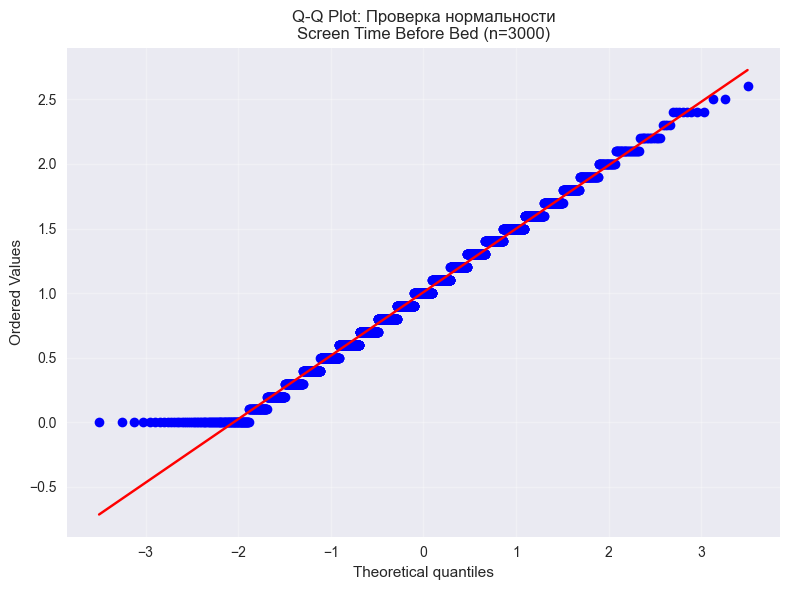

In [25]:
qq_plot(data['Screen_Time_Before_Bed'], 'Q-Q Plot: Проверка нормальности')

## III. 

Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler

### Удаление выбросов

In [27]:
def remove_outliers_iqr(series):
    """Удаление выбросов по правилу IQR"""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return series[(series >= lower_bound) & (series <= upper_bound)]

### Усечение выбросов

In [28]:
def winsorize_data(series, limits=(0.05, 0.05)):
    """Усечение выбросов (winsorization)"""
    from scipy.stats.mstats import winsorize
    return pd.Series(winsorize(series, limits=limits), index=series.index)

### Стандартизация и нормировка

In [29]:
def standardize_data(series):
    """Стандартизация (z-score)"""
    scaler = StandardScaler()
    return pd.Series(scaler.fit_transform(series.values.reshape(-1, 1)).flatten(), 
                     index=series.index)

def robust_scale_data(series):
    """Робастная стандартизация (устойчивая к выбросам)"""
    scaler = RobustScaler()
    return pd.Series(scaler.fit_transform(series.values.reshape(-1, 1)).flatten(), 
                     index=series.index)

def minmax_scale_data(series):
    """Нормировка в диапазон [0, 1]"""
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    return pd.Series(scaler.fit_transform(series.values.reshape(-1, 1)).flatten(), 
                     index=series.index)

### Логарифмирование и преобразования

In [30]:
def log_transform(series):
    """Логарифмическое преобразование"""
    constant = 1 - series.min() if series.min() <= 0 else 0
    return np.log(series + constant)

def boxcox_transform(series):
    """Преобразование Бокса-Кокса"""
    constant = 1 - series.min() if series.min() <= 0 else 0
    transformed, _ = stats.boxcox(series + constant)
    return pd.Series(transformed, index=series.index)

def sqrt_transform(series):
    """Квадратный корень"""
    constant = -series.min() if series.min() < 0 else 0
    return np.sqrt(series + constant)

def reciprocal_transform(series):
    """Обратное преобразование"""
    constant = 1 - series.min() if series.min() <= 0 else 0
    return 1 / (series + constant)

#### Сравнение методов

In [31]:
def compare_normalization_methods(original_series):
    """Сравнение различных методов нормализации"""
    
    methods = {
        'Исходные данные': original_series,
        'Удаление выбросов (IQR)': remove_outliers_iqr(original_series),
        'Усечение выбросов (Winsorize)': winsorize_data(original_series),
        'Стандартизация (Z-score)': standardize_data(original_series),
        'Робастная стандартизация': robust_scale_data(original_series),
        'Нормировка [0,1]': minmax_scale_data(original_series),
        'Логарифмирование': log_transform(original_series),
        'Бокса-Кокса': boxcox_transform(original_series),
        'Квадратный корень': sqrt_transform(original_series),
        'Обратное преобразование': reciprocal_transform(original_series)
    }
    
    results = []
    
    print("СРАВНЕНИЕ МЕТОДОВ ПРЕОБРАЗОВАНИЯ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ")
    
    for method_name, transformed_series in methods.items():
        normality_test = skewness_kurtosis_normality_test(transformed_series.dropna())
        
        results.append({
            'method': method_name,
            'skewness': normality_test['skewness'],
            'kurtosis': normality_test['kurtosis'],
            'p_skewness': normality_test['p_skewness'],
            'p_kurtosis': normality_test['p_kurtosis'],
            'reject_normality': normality_test['reject_normality'],
            'normality_score': normality_test['normality_score'],
            'n_after': len(transformed_series.dropna())
        })
        
        print(f"\n{method_name}:")
        print(f"  Объем данных: {results[-1]['n_after']}")
        print(f"  Асимметрия: {results[-1]['skewness']:.4f}")
        print(f"  Эксцесс: {results[-1]['kurtosis']:.4f}")
        print(f"  P-value (асимметрия): {results[-1]['p_skewness']:.4f}")
        print(f"  P-value (эксцесс): {results[-1]['p_kurtosis']:.4f}")
        print(f"  Оценка нормальности: {results[-1]['normality_score']:.4f}")
        print(f"  Нормальное распределение: {'✓' if not results[-1]['reject_normality'] else '✗'}")
    
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('normality_score', ascending=False)
    
    return results_df, methods

print("АНАЛИЗ ПРЕОБРАЗОВАНИЙ ДЛЯ Screen_Time_Before_Bed")

results_df, methods_dict = compare_normalization_methods(data['Screen_Time_Before_Bed'])

print("ЛУЧШИЙ МЕТОД:")
for i, (_, row) in enumerate(results_df.head(1).iterrows(), 1):
    print(f"{i}. {row['method']}:")
    print(f"   Оценка нормальности: {row['normality_score']:.4f}")
    print(f"   Асимметрия: {row['skewness']:.4f}")
    print(f"   Эксцесс: {row['kurtosis']:.4f}")
    print(f"   Нормальное распределение: {'✓' if not row['reject_normality'] else '✗'}")

АНАЛИЗ ПРЕОБРАЗОВАНИЙ ДЛЯ Screen_Time_Before_Bed
СРАВНЕНИЕ МЕТОДОВ ПРЕОБРАЗОВАНИЯ К НОРМАЛЬНОМУ РАСПРЕДЕЛЕНИЮ

Исходные данные:
  Объем данных: 3000
  Асимметрия: 0.0984
  Эксцесс: -0.3503
  P-value (асимметрия): 0.0277
  P-value (эксцесс): 0.0001
  Оценка нормальности: 0.9723
  Нормальное распределение: ✗

Удаление выбросов (IQR):
  Объем данных: 2997
  Асимметрия: 0.0789
  Эксцесс: -0.3948
  P-value (асимметрия): 0.0778
  P-value (эксцесс): 0.0000
  Оценка нормальности: 0.9222
  Нормальное распределение: ✗

Усечение выбросов (Winsorize):
  Объем данных: 3000
  Асимметрия: -0.0046
  Эксцесс: -0.9076
  P-value (асимметрия): 0.9180
  P-value (эксцесс): 0.0000
  Оценка нормальности: 0.0820
  Нормальное распределение: ✗

Стандартизация (Z-score):
  Объем данных: 3000
  Асимметрия: 0.0984
  Эксцесс: -0.3503
  P-value (асимметрия): 0.0277
  P-value (эксцесс): 0.0001
  Оценка нормальности: 0.9723
  Нормальное распределение: ✗

Робастная стандартизация:
  Объем данных: 3000
  Асимметрия: 0.09

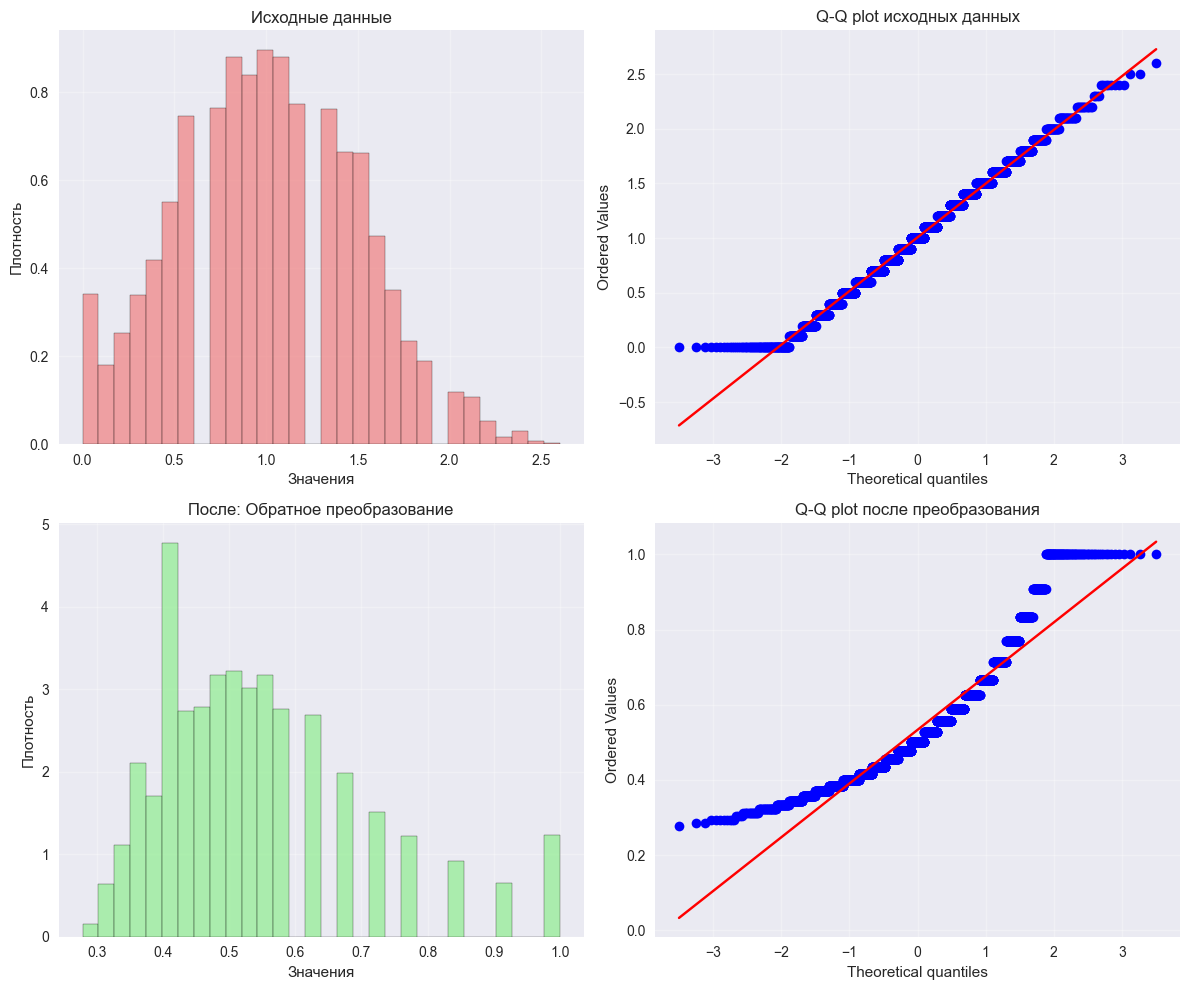

In [32]:
def plot_best_method(original_series, methods_dict, best_method_name):
    """Визуализация лучшего метода"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    axes[0, 0].hist(original_series.dropna(), bins=30, alpha=0.7, color='lightcoral', 
                   edgecolor='black', density=True)
    axes[0, 0].set_title('Исходные данные')
    axes[0, 0].set_xlabel('Значения')
    axes[0, 0].set_ylabel('Плотность')
    axes[0, 0].grid(True, alpha=0.3)
    
    stats.probplot(original_series.dropna(), dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q plot исходных данных')
    axes[0, 1].grid(True, alpha=0.3)
    
    transformed_series = methods_dict[best_method_name]
    axes[1, 0].hist(transformed_series.dropna(), bins=30, alpha=0.7, color='lightgreen',
                   edgecolor='black', density=True)
    axes[1, 0].set_title(f'После: {best_method_name}')
    axes[1, 0].set_xlabel('Значения')
    axes[1, 0].set_ylabel('Плотность')
    axes[1, 0].grid(True, alpha=0.3)
    
    stats.probplot(transformed_series.dropna(), dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title(f'Q-Q plot после преобразования')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

best_method_name = results_df.iloc[0]['method']
plot_best_method(data['Screen_Time_Before_Bed'], methods_dict, best_method_name)

In [33]:
# Сохранение лучшего преобразования
data['Screen_Time_Before_Bed_normalized'] = methods_dict[best_method_name]
print(f"\nЛучший метод '{best_method_name}' применен и сохранен в колонке 'Screen_Time_Before_Bed_normalized'")


Лучший метод 'Обратное преобразование' применен и сохранен в колонке 'Screen_Time_Before_Bed_normalized'


C:\Users\maryia_har\AppData\Local\Temp\ipykernel_26652\1965960560.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Screen_Time_Before_Bed_normalized'] = methods_dict[best_method_name]


## Выполните пункты I и II для обработанных данных

### Среднее

In [34]:
print(f"Mean: {data['Screen_Time_Before_Bed_normalized'].mean():.5f}")

Mean: 0.53320


### Дисперсия

In [35]:
print(f"Variance: {data['Screen_Time_Before_Bed_normalized'].var():.5f}")

Variance: 0.02258


### Мода

In [36]:
modes = data['Screen_Time_Before_Bed_normalized'].round(1).mode()
print(f'Number of modes: {len(modes)}')

Number of modes: 1


In [37]:
print(f'Mode: {modes[0]}')

Mode: 0.5


### Медиана

In [38]:
print(f"Median: {data['Screen_Time_Before_Bed_normalized'].median()}")

Median: 0.5


### Квантили уровня 0.25, 0.5, 0.75

In [39]:
data['Screen_Time_Before_Bed_normalized'].quantile([0.25, 0.5, 0.75])

0.25    0.416667
0.50    0.500000
0.75    0.588235
Name: Screen_Time_Before_Bed_normalized, dtype: float64

### Эксцесс Фишера (g₂)

$$
g_2 = \frac{\mu_4}{\mu_2^2} - 3 = \beta_2 - 3
$$

$$
g_2 = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{\left(\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^2\right)^2} - 3

In [40]:
print(f"Kurtosis: {float(data['Screen_Time_Before_Bed_normalized'].kurt()):.3f}")

Kurtosis: 1.387


### Ассиметрия

In [41]:
print(f"Skewness: {float(data['Screen_Time_Before_Bed_normalized'].skew()):.3f}")

Skewness: 1.212


### Интерквартильный размах

In [42]:
Q1 = data['Screen_Time_Before_Bed_normalized'].quantile(0.25)
Q3 = data['Screen_Time_Before_Bed_normalized'].quantile(0.75)
IQR = Q3 - Q1
print(f'IQR: {IQR}')

IQR: 0.1715686274509804


### 1. Гистограмма

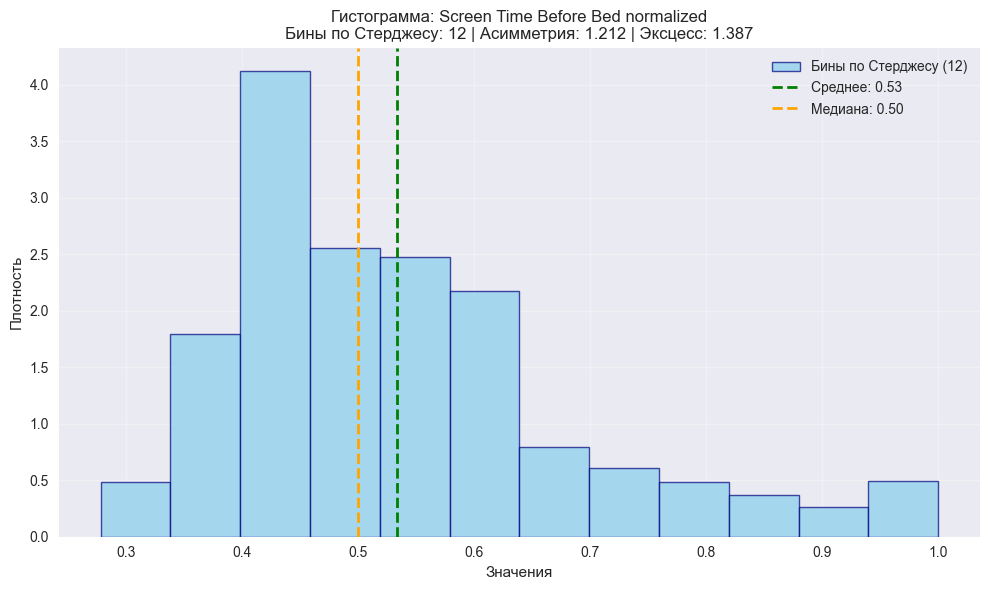

Формула Стерджеса для n=3000:
  k = 1 + log2(3000) = 1 + 11.55 = 12 бинов
  Диапазон данных: [0.28, 1.00]
  Ширина бина: 0.06


In [43]:
plot_histogram_sturges(data['Screen_Time_Before_Bed_normalized'], 'Screen Time Before Bed normalized')

### 2. Эмпирическая функция распределения

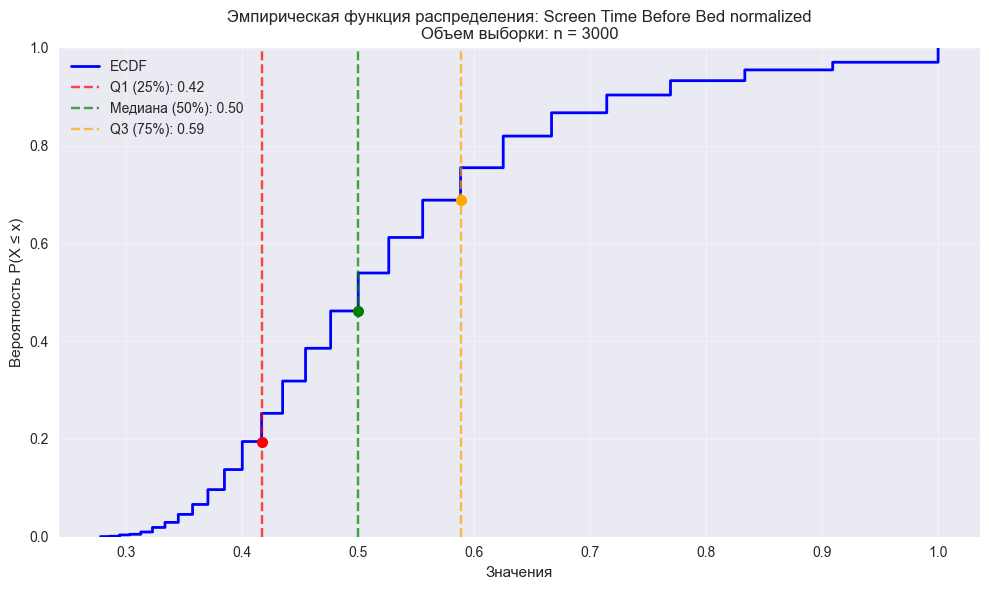

In [58]:
plot_ecdf(data['Screen_Time_Before_Bed_normalized'], 'Screen Time Before Bed normalized')

## II. Проверить данные на нормальность, используя критерии:
### 1. Хи-квадрат

In [44]:
print("ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ ХИ-КВАДРАТ")

result = chi_square_normality_test(data['Screen_Time_Before_Bed_normalized'])

print(f"Объем выборки: n = {len(data['Screen_Time_Before_Bed_normalized'])}")
print(f"Количество интервалов: {result['number_of_intervals']}")
print(f"Степени свободы: {result['degrees_of_freedom']}")
print(f"Статистика Хи-квадрат: {result['chi_square_stat']:.4f}")
print(f"Критическое значение (α=0.05): {result['critical_value']:.4f}")
print(f"P-value: {result['p_value']:.4f}")

print("\nГИПОТЕЗЫ:")
print("H₀ (нулевая гипотеза): Распределение является нормальным")
print("H₁ (альтернативная гипотеза): Распределение не является нормальным")

print("\nРЕЗУЛЬТАТ:")
if result['reject_normality']:
    print("✓ ОТКЛОНЯЕМ гипотезу H₀")
    print("  Распределение НЕ является нормальным (p < 0.05)")
else:
    print("✓ НЕТ ОСНОВАНИЙ отвергнуть гипотезу H₀")
    print("  Распределение МОЖЕТ СЧИТАТЬСЯ нормальным (p ≥ 0.05)")

print(f"\nДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:")
print(f"Наблюдаемые частоты: {result['observed_frequencies']}")
print(f"Ожидаемые частоты: {result['expected_frequencies'].round(2)}")

ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ ХИ-КВАДРАТ
Объем выборки: n = 3000
Количество интервалов: 12
Степени свободы: 9
Статистика Хи-квадрат: 658.3040
Критическое значение (α=0.05): 16.9190
P-value: 0.0000

ГИПОТЕЗЫ:
H₀ (нулевая гипотеза): Распределение является нормальным
H₁ (альтернативная гипотеза): Распределение не является нормальным

РЕЗУЛЬТАТ:
✓ ОТКЛОНЯЕМ гипотезу H₀
  Распределение НЕ является нормальным (p < 0.05)

ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ:
Наблюдаемые частоты: [ 57 355 345 399 462 218 229 199 194 143 109 290]
Ожидаемые частоты: [250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250. 250.]


### 2. Ассиметрии и эксцесса

In [45]:
print("ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА")

result = skewness_kurtosis_normality_test(data['Screen_Time_Before_Bed_normalized'])

print(f"Объем выборки: n = {len(data['Screen_Time_Before_Bed_normalized'])}")
print()

print("РАСЧЕТ АСИММЕТРИИ:")
print(f"Коэффициент асимметрии: {result['skewness']:.4f}")
print(f"Стандартная ошибка асимметрии: {result['se_skewness']:.4f}")
print(f"Z-статистика асимметрии: {result['z_skewness']:.4f}")
print(f"P-value асимметрии: {result['p_skewness']:.4f}")
print(f"Критическое значение (α=0.05): ±{result['critical_value']:.4f}")

print("\nРАСЧЕТ ЭКСЦЕССА:")
print(f"Коэффициент эксцесса: {result['kurtosis']:.4f}")
print(f"Стандартная ошибка эксцесса: {result['se_kurtosis']:.4f}")
print(f"Z-статистика эксцесса: {result['z_kurtosis']:.4f}")
print(f"P-value эксцесса: {result['p_kurtosis']:.4f}")
print(f"Критическое значение (α=0.05): ±{result['critical_value']:.4f}")

print("\nГИПОТЕЗЫ:")
print("H₀ (нулевая гипотеза): Распределение является нормальным")
print("H₁ (альтернативная гипотеза): Распределение не является нормальным")
print("\nКритерий отвержения H₀:")
print("- |Z-асимметрии| > Zкритическое ИЛИ |Z-эксцесса| > Zкритическое")

print("\nРЕЗУЛЬТАТЫ ТЕСТОВ:")
print(f"Тест асимметрии: {'ОТКЛОНЯЕМ H₀' if result['reject_skewness'] else 'НЕТ ОСНОВАНИЙ отвергнуть H₀'}")
print(f"Тест эксцесса: {'ОТКЛОНЯЕМ H₀' if result['reject_kurtosis'] else 'НЕТ ОСНОВАНИЙ отвергнуть H₀'}")

print("\nИТОГОВЫЙ ВЫВОД:")
if result['reject_normality']:
    print("✓ ОТКЛОНЯЕМ гипотезу о нормальности")
    print("  Распределение НЕ является нормальным")
    
    if result['reject_skewness'] and result['reject_kurtosis']:
        print("  Причина: значимые отклонения по асимметрии и эксцессу")
    elif result['reject_skewness']:
        print("  Причина: значимое отклонение по асимметрии")
    else:
        print("  Причина: значимое отклонение по эксцессу")
else:
    print("✓ НЕТ ОСНОВАНИЙ отвергнуть гипотезу о нормальности")
    print("  Распределение МОЖЕТ СЧИТАТЬСЯ нормальным")

ПРОВЕРКА НОРМАЛЬНОСТИ: КРИТЕРИЙ АСИММЕТРИИ И ЭКСЦЕССА
Объем выборки: n = 3000

РАСЧЕТ АСИММЕТРИИ:
Коэффициент асимметрии: 1.2116
Стандартная ошибка асимметрии: 0.0447
Z-статистика асимметрии: 27.1057
P-value асимметрии: 0.0000
Критическое значение (α=0.05): ±1.9600

РАСЧЕТ ЭКСЦЕССА:
Коэффициент эксцесса: 1.3828
Стандартная ошибка эксцесса: 0.0894
Z-статистика эксцесса: 15.4726
P-value эксцесса: 0.0000
Критическое значение (α=0.05): ±1.9600

ГИПОТЕЗЫ:
H₀ (нулевая гипотеза): Распределение является нормальным
H₁ (альтернативная гипотеза): Распределение не является нормальным

Критерий отвержения H₀:
- |Z-асимметрии| > Zкритическое ИЛИ |Z-эксцесса| > Zкритическое

РЕЗУЛЬТАТЫ ТЕСТОВ:
Тест асимметрии: ОТКЛОНЯЕМ H₀
Тест эксцесса: ОТКЛОНЯЕМ H₀

ИТОГОВЫЙ ВЫВОД:
✓ ОТКЛОНЯЕМ гипотезу о нормальности
  Распределение НЕ является нормальным
  Причина: значимые отклонения по асимметрии и эксцессу


In [46]:
interpret_skewness_kurtosis(result['skewness'], result['kurtosis'])


ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ:
Асимметрия (1.212): сильная правая асимметрия
Эксцесс (1.383): тяжелые хвосты (лептокуртическое)


### Q-Q plot

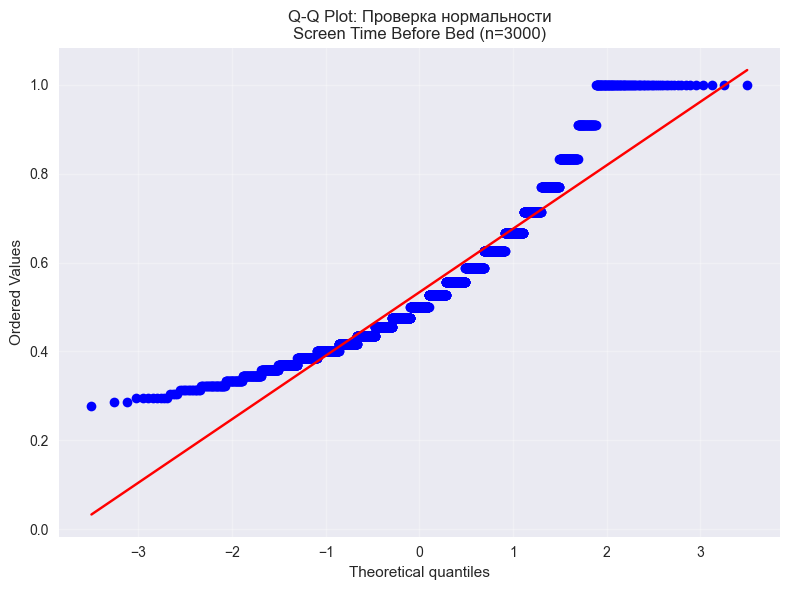

In [47]:
qq_plot(data['Screen_Time_Before_Bed_normalized'], 'Q-Q Plot: Проверка нормальности')

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

In [48]:
data_2_col = df[['Screen_Time_Before_Bed', 'School_Grade']]
data_2_col.head()

,Screen_Time_Before_Bed,School_Grade
0,1.4,9th
1,0.9,7th
2,0.5,11th
3,1.4,12th
4,1.0,9th


In [49]:
grouped_data = data_2_col.groupby('School_Grade')

### 1. На одном графике постройте гистограммы для каждой группы.

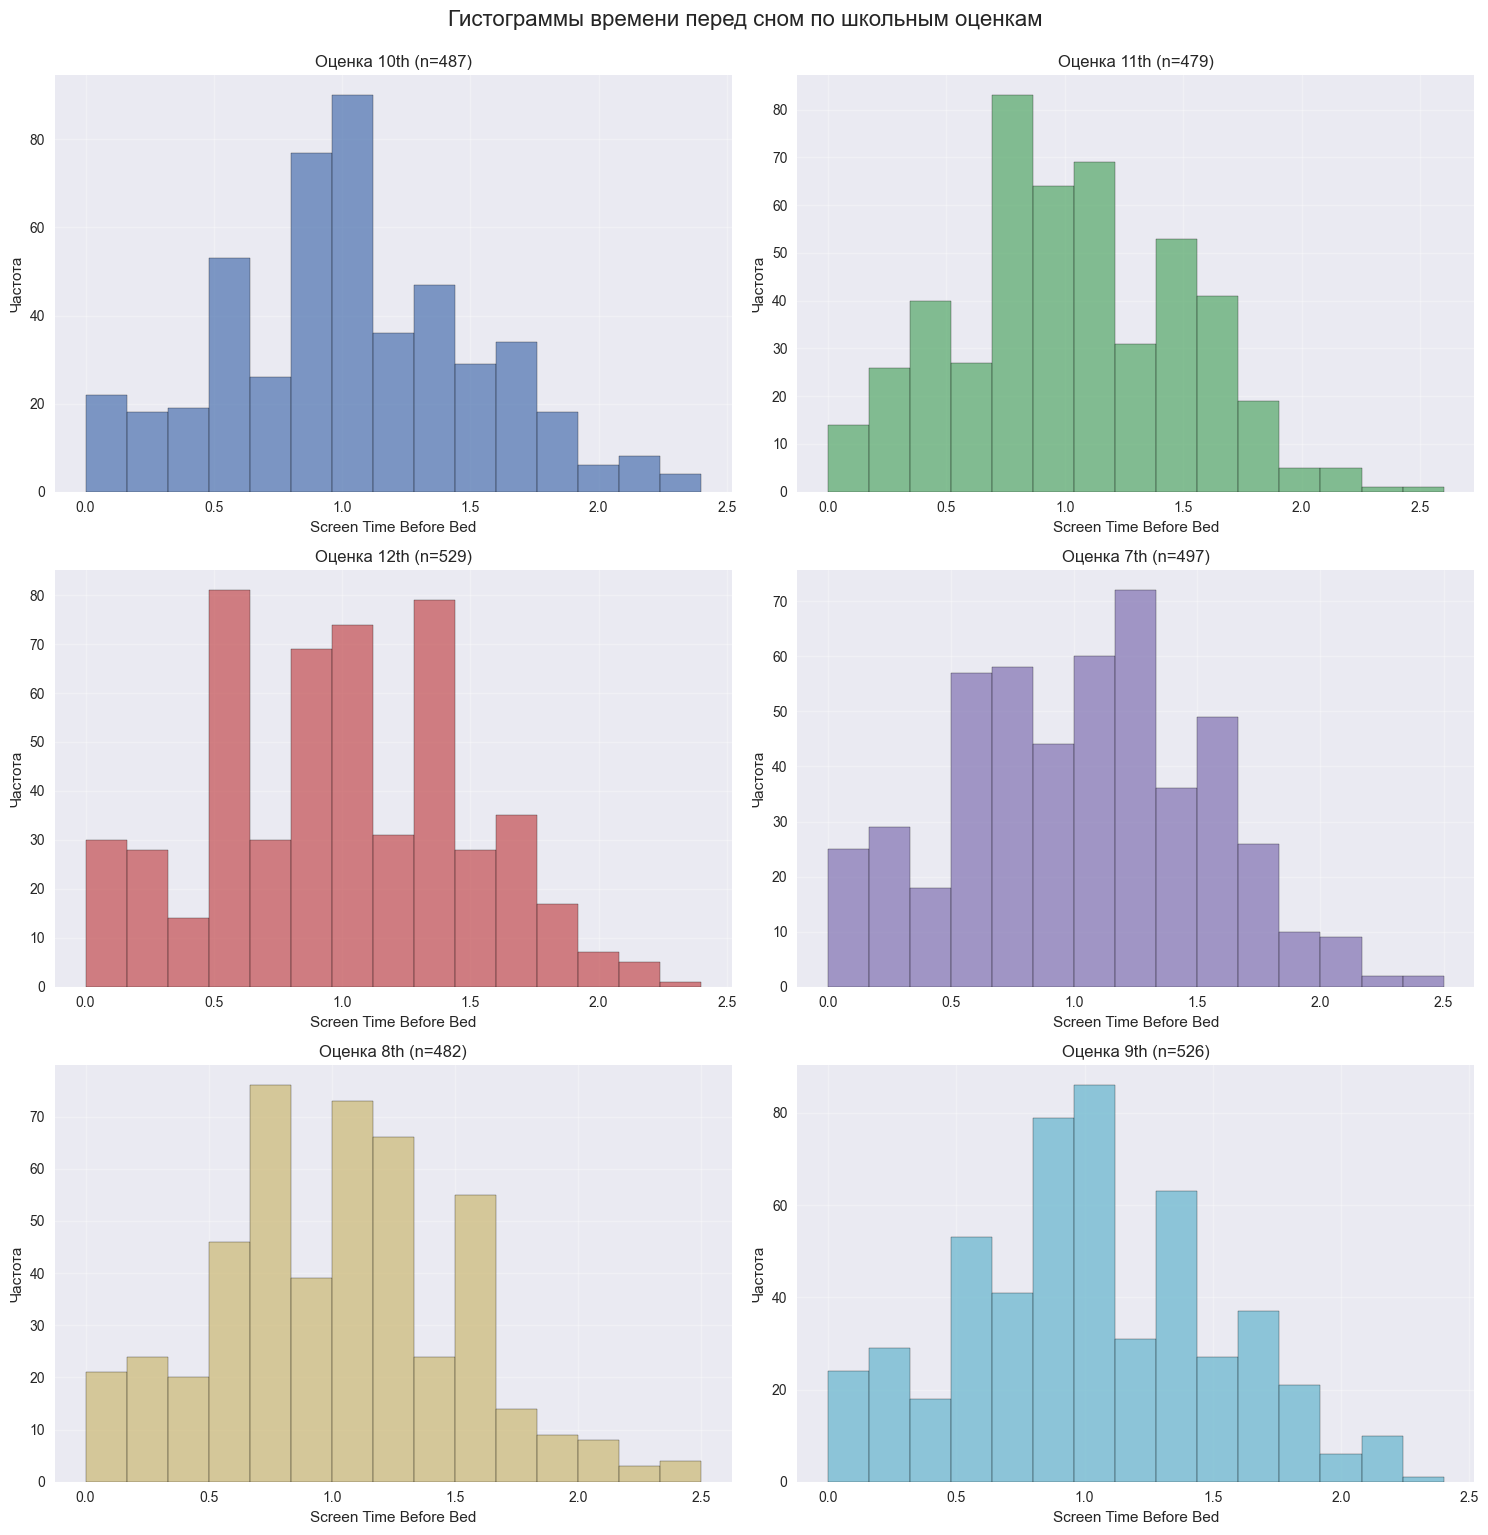

In [50]:
grades = sorted(data_2_col['School_Grade'].unique())
n_grades = len(grades)

cols = 2  
rows = (n_grades + 1) // 2  

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten() if rows > 1 else [axes] if cols == 1 else axes

for i, grade in enumerate(grades):
    if i < len(axes):
        grade_data = data_2_col[data_2_col['School_Grade'] == grade]['Screen_Time_Before_Bed']
        
        axes[i].hist(grade_data, bins=15, alpha=0.7, color=f'C{i}', edgecolor='black')
        axes[i].set_title(f'Оценка {grade} (n={len(grade_data)})')
        axes[i].set_xlabel('Screen Time Before Bed')
        axes[i].set_ylabel('Частота')
        axes[i].grid(True, alpha=0.3)

for i in range(len(grades), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.suptitle('Гистограммы времени перед сном по школьным оценкам', y=1.02, fontsize=16)
plt.show()

### 2. Рассчитайте среднее, дисперсию внутри каждой группы

In [51]:
print("СРЕДНЕЕ И ДИСПЕРСИЯ ПО ГРУППАМ:")

stats_by_group = grouped_data['Screen_Time_Before_Bed'].agg(['count', 'mean', 'var', 'std'])
print(stats_by_group)

СРЕДНЕЕ И ДИСПЕРСИЯ ПО ГРУППАМ:
              count      mean       var       std
School_Grade                                     
10th            487  1.020945  0.240960  0.490876
11th            479  1.022547  0.233507  0.483226
12th            529  0.982420  0.243762  0.493723
7th             497  1.006640  0.254694  0.504672
8th             482  1.005187  0.241366  0.491290
9th             526  1.005133  0.244107  0.494072


### Различия распределений внутри разных групп 'School_Grade'

In [52]:
extended_stats = grouped_data['Screen_Time_Before_Bed'].agg([
    'count', 'mean', 'var', 'std', 'skew', 
    'min', 'max', 'median'
])

extended_stats['kurtosis'] = grouped_data['Screen_Time_Before_Bed'].apply(pd.Series.kurt)

extended_stats['Q1'] = grouped_data['Screen_Time_Before_Bed'].quantile(0.25)
extended_stats['Q3'] = grouped_data['Screen_Time_Before_Bed'].quantile(0.75)
extended_stats['IQR'] = extended_stats['Q3'] - extended_stats['Q1']

extended_stats = extended_stats.rename(columns={
    'count': 'count',
    'mean': 'mean', 
    'var': 'variance',
    'std': 'std',
    'skew': 'skewness',
    'min': 'min',
    'max': 'max',
    'median': 'median'
})

extended_stats = extended_stats[['count', 'mean', 'variance', 'std', 'skewness', 'kurtosis', 
                               'min', 'Q1', 'median', 'Q3', 'max', 'IQR']]

print("РАСШИРЕННАЯ СТАТИСТИКА ПО ГРУППАМ:")
print(extended_stats)

РАСШИРЕННАЯ СТАТИСТИКА ПО ГРУППАМ:
              count      mean  variance       std  skewness  kurtosis  min  \
School_Grade                                                                 
10th            487  1.020945  0.240960  0.490876  0.138856 -0.183095  0.0   
11th            479  1.022547  0.233507  0.483226  0.131457 -0.393479  0.0   
12th            529  0.982420  0.243762  0.493723  0.037090 -0.516036  0.0   
7th             497  1.006640  0.254694  0.504672  0.029111 -0.466100  0.0   
8th             482  1.005187  0.241366  0.491290  0.178104 -0.097554  0.0   
9th             526  1.005133  0.244107  0.494072  0.099741 -0.388616  0.0   

               Q1  median   Q3  max  IQR  
School_Grade                              
10th          0.7     1.0  1.3  2.4  0.6  
11th          0.7     1.0  1.4  2.6  0.7  
12th          0.6     1.0  1.3  2.4  0.7  
7th           0.6     1.0  1.4  2.5  0.8  
8th           0.7     1.0  1.3  2.5  0.6  
9th           0.7     1.0  1.3  2.4  0.

### Anova

In [53]:
import scipy.stats as stats
import pandas as pd
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [55]:
anova_groups = []
for grade in sorted(data_2_col['School_Grade'].unique()):
    grade_data = data_2_col[data_2_col['School_Grade'] == grade]['Screen_Time_Before_Bed'].dropna()
    anova_groups.append(grade_data)

In [58]:
f_stat, p_value = stats.f_oneway(*anova_groups)

'''
    SSB (Sum of Squares Between) - вариация МЕЖДУ группами: SSB = Σ n_i × (ȳ_i - ȳ)²
    SSW (Sum of Squares Within) - вариация ВНУТРИ групп: SSW = Σ Σ (y_ij - ȳ_i)²
    SST (Total Sum of Squares) - общая вариация: SST = SSB + SSW

    Степени свободы:
    dfB (между группами): k - 1 (где k - количество групп)
    dfW (внутри групп): N - k (где N - общее количество наблюдений)

    Средние квадраты:
    MSB (Mean Square Between): MSB = SSB / dfB
    MSW (Mean Square Within): MSW = SSW / dfW
    F-статистика: F = MSB / MSW

    Интерпретация F-статистики
    Сравниваем полученное F-значение с критическим значением из F-распределения с (dfB, dfW) степенями свободы.
    '''

print(f"F-статистика: {f_stat:.4f}")
print(f"P-value: {p_value:.4f}")

F-статистика: 0.4387
P-value: 0.8217


In [59]:
print(f"\nИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:")
if p_value < 0.05:
    print("✓ СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ РАЗЛИЧИЯ")
    print("  Существуют значимые различия в среднем времени перед сном между группами с разными школьными оценками")
else:
    print("✓ СТАТИСТИЧЕСКИ НЕЗНАЧИМЫЕ РАЗЛИЧИЯ")
    print("  Нет значимых различий в среднем времени перед сном между группами с разными школьными оценками")


ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ:
✓ СТАТИСТИЧЕСКИ НЕЗНАЧИМЫЕ РАЗЛИЧИЯ
  Нет значимых различий в среднем времени перед сном между группами с разными школьными оценками
